In [1]:
import random

import pandas as pd
import numpy as np

from pathlib import Path

In [2]:
RANDOM_SEED = 42
DATA_PATH = Path("../../data")

np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [3]:
train_data = pd.read_csv(DATA_PATH / "train.csv")
test_data = pd.read_csv(DATA_PATH / "test.csv")

In [4]:
train_data

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.0,500.0,496,0.29325,3640.1,4473.0,9.1949,26.867,42.379,2700.2,...,53.429,29.249,60.773,21.532,40.451,34.064,48.953,48.291,40.812,18.756
249996,0.0,500.0,497,0.29134,3625.7,4506.2,9.2109,26.889,42.291,2700.6,...,53.830,28.975,61.517,21.750,42.762,42.645,51.055,48.589,40.933,19.360
249997,0.0,500.0,498,0.29438,3600.2,4478.3,9.1957,26.820,42.448,2700.3,...,54.163,28.676,61.656,21.487,42.109,39.770,46.770,48.648,41.465,19.344
249998,0.0,500.0,499,0.25269,3683.5,4486.4,9.2832,27.188,42.757,2697.4,...,53.453,24.889,61.564,21.392,39.334,42.274,43.623,48.797,39.835,18.512


In [5]:
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()
train_data.iloc[:, 3:] = st_scaler.fit_transform(train_data.iloc[:, 3:])
test_data.iloc[:, 2:] = st_scaler.fit_transform(test_data.iloc[:, 2:])

In [6]:
train_data

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,-0.003307,0.300365,0.514600,-1.342734,-0.062398,0.294727,-0.098048,...,-0.489007,0.005770,1.001364,-0.150228,-0.078897,1.424530,0.520012,-0.165135,0.284192,0.224294
1,0.0,1.0,2,0.019690,-0.128967,1.218406,0.925081,-0.856781,1.091018,-0.005032,...,-1.191640,-0.016944,-1.639731,-0.250199,0.078954,0.153478,-1.208819,-0.195688,0.470947,-0.631770
2,0.0,1.0,3,-0.003307,-0.102502,-0.791012,1.114066,-0.128597,-1.224633,0.154425,...,0.816186,0.008733,-0.018895,0.308128,0.123494,0.300514,0.070048,-0.180596,0.175098,1.647425
3,0.0,1.0,4,-0.023065,-0.073095,0.083646,1.522366,-0.681827,-1.256668,0.287305,...,-0.058911,0.028155,-1.159751,0.113845,0.132008,-0.009071,0.428148,-0.110653,0.996079,-0.020296
4,0.0,1.0,5,1.411178,0.447396,-0.301407,-0.105001,-0.062398,1.429671,0.008256,...,-0.672117,1.368627,-0.467519,-0.508614,-0.596992,1.300426,0.472379,-0.225506,0.744607,0.233859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.0,500.0,496,1.385266,-0.696510,-0.913413,-1.775532,-0.166424,0.189470,-0.642856,...,-1.159702,1.517422,-0.422496,-1.291404,0.259076,-1.360723,1.028667,0.122366,-0.540488,0.435407
249996,0.0,500.0,497,1.323400,-1.119961,-0.066805,-1.588880,-0.062398,-0.213252,-0.589704,...,-0.305897,1.427223,0.175670,-0.880204,1.772750,1.533121,1.922641,0.232066,-0.316752,0.848067
249997,0.0,500.0,498,1.421867,-1.869822,-0.778261,-1.766199,-0.388662,0.505241,-0.629568,...,0.403124,1.328795,0.287424,-1.376285,1.345044,0.563560,0.100244,0.253785,0.666947,0.837135
249998,0.0,500.0,499,0.071514,0.579725,-0.571710,-0.745449,1.351414,1.919344,-1.014920,...,-1.108601,0.082143,0.213457,-1.555478,-0.472544,1.408005,-1.238164,0.308634,-2.347016,0.268703


In [7]:
test_data

,sample,simulationRun,xmeas_1,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,...,xmv_10,xmv_11,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9
0,1,151,-0.002338,-0.060916,0.145882,0.131802,-0.169875,0.709839,0.573962,-0.163616,...,-0.127368,-0.549712,-0.105689,-0.103624,0.019535,-0.112630,0.019492,0.132072,0.573828,-0.074321
1,2,151,0.036047,-0.026502,0.105273,-0.531288,-0.175520,0.771414,1.502962,-0.165572,...,0.003636,0.391304,-0.096390,-0.130366,-0.579333,-0.125911,-0.006767,-0.531376,1.502670,-0.106289
2,3,151,0.020263,-0.056182,0.167482,-1.447268,-0.158585,0.008259,1.684231,-0.157747,...,-0.006660,-0.544315,-0.021046,-0.118821,-0.338023,-0.090153,0.015741,-1.446874,1.684012,-0.059987
3,4,151,-0.015730,-0.100793,0.181306,-1.729031,-0.177402,-1.118748,-0.462421,-0.146009,...,-0.010318,-0.636064,-0.049893,-0.093607,0.205601,-0.110791,0.049730,-1.728696,-0.462713,-0.060074
4,5,151,-0.117850,-0.356989,0.159706,-1.569730,-0.171757,-1.617878,-0.384594,-0.157747,...,0.059858,-0.418674,-0.141178,-0.179012,-0.153144,-0.131939,-0.181715,-1.569346,-0.385238,-0.065895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710395,956,438,-2.983064,-2.429497,-6.239227,0.335907,5.251080,0.237765,-0.463406,6.517143,...,-5.593004,0.008767,-2.365989,6.283341,6.375090,7.853322,-4.328596,0.336419,-0.463990,4.528284
710396,957,438,-2.983064,-2.429497,-6.239227,0.335907,5.251080,0.237765,-0.463406,6.517143,...,-5.593009,0.007903,-2.050762,6.283341,6.375090,7.853322,-4.526075,0.336419,-0.463990,4.528284
710397,958,438,-2.983064,-2.429497,-6.239227,0.335907,5.251080,0.237765,-0.463406,6.517143,...,-5.593014,0.006824,-2.050762,6.283341,6.375090,7.853322,-4.526075,0.336419,-0.463990,4.528284
710398,959,438,-2.983064,-2.429497,-6.239227,0.335907,5.251080,0.237765,-0.463406,6.517143,...,-5.593019,0.005744,-2.386486,6.283341,6.375090,7.853322,-4.324606,0.336419,-0.463990,4.528284


In [8]:
# LSTM 입력데이터 (batch size, time step, feature dimension) 

In [9]:
import torch
from torch.utils.data import Dataset, DataLoader

class TrainCustomDataset(Dataset):
    def __init__(self, data, window_size=1, transform=False):
        self.data = data
        self.window_size = window_size
        self.transform = transform
    
    def __len__(self):
        return len(self.data) - self.window_size + 1
    
    def __getitem__(self, idx):
        dataX = self.data[idx:idx+self.window_size, 3:]
        
        if self.transform:
            dataX = self.transform(dataX)
        
        return torch.tensor(data=dataX, dtype=torch.float32)

class TestCustomDataset(Dataset):
    def __init__(self, data, window_size=1, transform=None):
        self.data = data
        self.window_size = window_size
        self.transform = transform
    
    def __len__(self):
        return len(self.data) - self.window_size + 1
    
    def __getitem__(self, idx):
        dataX = self.data[idx:idx+self.window_size, 2:]
        
        if self.transform:
            dataX = self.transform(dataX)
        
        return torch.tensor(data=dataX, dtype=torch.float32)

In [10]:
# def standazation(data):
#     mean = np.mean(data, axis=0)
#     std = np.std(data, axis=0)
#     print(std)
        
#     return (data - mean) / std

In [11]:
# train = np.array(train_data.iloc[:200000, :])
# valid = np.array(train_data.iloc[200000:, :])
# test = np.array(test_data)
# train_custom_dataset = TrainCustomDataset(train, transform=standazation)
# valid_custom_dataset = TrainCustomDataset(valid, transform=standazation)
# test_custom_dataset = TestCustomDataset(test, transform=standazation)

In [12]:
train = np.array(train_data.iloc[:200000, :])
valid = np.array(train_data.iloc[200000:, :])
test = np.array(test_data)
train_custom_dataset = TrainCustomDataset(train)
valid_custom_dataset = TrainCustomDataset(valid)
test_custom_dataset = TestCustomDataset(test)

In [13]:
train_batch_size = 500
test_batch_size = 960

train_data_loader = DataLoader(train_custom_dataset, batch_size=train_batch_size, shuffle=False)
valid_data_loader = DataLoader(valid_custom_dataset, batch_size=train_batch_size, shuffle=False)
test_data_loader = DataLoader(test_custom_dataset, batch_size=test_batch_size, shuffle=False)

In [14]:
for X in train_data_loader:
    print(X.shape)
    break

torch.Size([500, 1, 52])


In [15]:
# from torch.utils.data import TensorDataset
# from torch.utils.data import DataLoader

# def train_build_dataset(time_series, seq_length):
#     dataX = []
#     dataY = []
#     for i in range(0, len(time_series)-seq_length):
#         _x = time_series[i:i+seq_length, 3:]
#         _y = time_series[i+seq_length, [0]]
#         dataX.append(_x)
#         dataY.append(_y)
#     return np.array(dataX), np.array(dataY)

# def test_build_dataset(time_series, seq_length):
#     dataX = [] # Y 데이터가 존재하지 않음
#     for i in range(0, len(time_series)-seq_length):
#         _x = time_series[i:i+seq_length, 2:]
#         dataX.append(_x)
#     return np.array(dataX)

In [16]:
# # train은 1simulationRun 당 500개의 샘플링이 존재함
# train_seq_length = 500

# # test는 1simulationRun 당 960개의 샘플링이 존재함
# test_seq_length = 960

# train_X, train_y = train_build_dataset(np.array(train_data), seq_length=train_seq_length)
# test_X = test_build_dataset(np.array(test_data), seq_length=test_seq_length)

In [17]:
input_size = 52 # 입력 특성 수(Columns 개수)
hidden_size = 32 # hidden layer의 크기
"""
일반적으로 hidden layer를 더 많이 추가하면 모델의 표현력이 향상되지만, 
과적합(overfitting)의 위험이 있을 수 있습니다. 
따라서 hidden layer의 개수를 결정할 때는 모델의 복잡성과 데이터의 복잡성을 고려하여 조절해야 합니다. 실험을 통해 최적의 hidden layer 개수를 찾는 것이 좋습니다.
"""
h_layers_num = 8 # hidden layer의 개수
output_size = 52 # 출력 크기


learning_rate = 0.001
epochs = 50

In [18]:
import torch
import torch.nn as nn

In [19]:
""" LSTM Encoder """
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            dropout=0.1,
                            bidirectional=False)
        
    def forward(self, x):
        outputs, (hidden, cell) = self.lstm(x) # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        return (hidden, cell)

""" LSTM Decoder """
class Decoder(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            dropout=0.1,
                            bidirectional=False)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(in_features=hidden_size,
                            out_features=output_size)
        
    def forward(self, x, hidden):
        output, (hidden, cell) = self.lstm(x, hidden) # out: tensor of shape (batch_size, seq_length, hidden_size)
        prediction = self.fc(output)
        
        return prediction, (hidden, cell)


In [20]:
class LSTMAutoEncoder(nn.Module):
    
    def __init__(self, 
                 input_dim: int, 
                 latent_dim: int, 
                 window_size: int=1, 
                 **kwargs) -> None:
        """
        :param input_dim: 변수 Tag 갯수
        :param latent_dim: 최종 압축할 차원 크기
        :param window_size: 길이
        :param kwargs:
        """
        
        super(LSTMAutoEncoder, self).__init__()
        
        self.latent_dim = latent_dim
        self.input_dim = input_dim
        self.window_size = window_size
        
        if "num_layers" in kwargs:
            num_layers = kwargs.pop("num_layers")
        else:
            num_layers = 1
            
        self.encoder = Encoder(
            input_size = input_dim,
            hidden_size = latent_dim,
            num_layers = num_layers,
        )
        self.reconstruct_decoder = Decoder(
            input_size = input_dim,
            output_size = output_size,
            hidden_size = latent_dim,
            num_layers = num_layers,
        )
        
    def forward(self, src:torch.Tensor, **kwargs):
        batch_size, sequence_length, var_length = src.size()
        
        # Input Encoder
        encoder_hidden = self.encoder(src)
        
        inv_idx = torch.arange(sequence_length - 1, -1, -1).long()
        reconstruct_output = []
        temp_input = torch.zeros((batch_size, sequence_length, var_length), dtype=torch.float).to(src.device)
        hidden = encoder_hidden
        for i in range(sequence_length):
            temp_input, hidden = self.reconstruct_decoder(temp_input, hidden)
            reconstruct_output.append(temp_input)
        reconstruct_output = torch.cat(reconstruct_output, dim = 1)[:, inv_idx, :]
        
        return [reconstruct_output, src]
    
    def loss_function(self,
                      *args,
                      **kwargs) -> dict:
        recons = args[0]
        input = args[1]
        
        loss = torch.nn.functional.mse_loss(recons, input)
        return loss
        

In [21]:
from tqdm.auto import tqdm

def run(args, model, train_loader, test_loader):

    optimizer = torch.optim.Adam(model.parameters(), lr=args.learning_rate)
    epochs = tqdm(range(args.max_iter//len(train_loader)))
    
    
    count = 0
    best_loss = 100000000
    train_eval_loss_list = []
    test_eval_loss_list = []
    for epoch in epochs:
        model.train()
        optimizer.zero_grad()
        train_iterator = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"training epoch {epoch}")
        
        loss_list = []
        for i, batch_data in train_iterator:
            
            if count > args.max_iter:
                return model
            count += 1
            
            batch_data = batch_data.to(args.device)
            predict_values = model(batch_data)
            loss = model.loss_function(*predict_values)
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            train_iterator.set_postfix({
                "train_loss" : float(loss),
            })
            loss_list.append(float(loss))
        train_eval_loss_list.append(np.mean(loss_list))
            
        model.eval()
        
        eval_loss = 0
        test_iterator = tqdm(enumerate(test_loader), total=len(test_loader), desc=f"testing epoch {epoch}")
        with torch.no_grad():
            for i, batch_data in test_iterator:
                
                batch_data = batch_data.to(args.device)
                predict_values = model(batch_data)
                loss = model.loss_function(*predict_values)
                
                eval_loss += loss.mean().item()
                
                test_iterator.set_postfix({
                    "eval_loss" : float(loss),
                })
                
            eval_loss = eval_loss / len(test_loader)
            epochs.set_postfix({
                "Evaluation Score" : float(eval_loss),
            })
            test_eval_loss_list.append(eval_loss)
            if eval_loss < best_loss:
                best_loss = eval_loss
            else:
                if args.early_stop:
                    print("early stop condition    best_loss[{}]  eval_loss[{}]".format(best_loss, eval_loss))
    return model, train_eval_loss_list, test_eval_loss_list
    
def get_loss_list(args, model, test_loader):
    with torch.no_grad():
        test_iterator = tqdm(enumerate(test_loader), total=len(test_loader), desc="testing")
        loss_list = []
        with torch.no_grad():        
            for i, batch_data in test_iterator:   
                batch_data = batch_data.to(args.device)
                predict_values = model(batch_data)
                
                # MAE(Mean Absolute Error) 계산, reduce 파라미터 : ?
                loss = torch.nn.functional.l1_loss(predict_values[0], predict_values[1], reduction="none")
                
                loss = loss.mean(dim=1).cpu().numpy()
                loss_list.append(loss)
        loss_list = np.concatenate(loss_list, axis=0)
        return loss_list

In [22]:
import easydict
args = easydict.EasyDict({
    "batch_size" : 500,
    "device" : torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'),
    "input_size" : 52,
    "latent_size" : 32,
    "output_size" : 52,
    "window_size" : 3,
    "num_layers" : 2,
    "learning_rate" : 0.0001,
    "max_iter" : 20000,
    "early_stop" : True,
})

In [23]:
model = LSTMAutoEncoder(input_dim=args.input_size,
                        latent_dim=args.latent_size,
                        window_size = args.window_size,
                        num_layers = args.num_layers,)
model.to(args.device)

LSTMAutoEncoder(
  (encoder): Encoder(
    (lstm): LSTM(52, 32, num_layers=2, batch_first=True, dropout=0.1)
  )
  (reconstruct_decoder): Decoder(
    (lstm): LSTM(52, 32, num_layers=2, batch_first=True, dropout=0.1)
    (relu): ReLU()
    (fc): Linear(in_features=32, out_features=52, bias=True)
  )
)

In [24]:
model, train_loss, valid_loss = run(args, model, train_data_loader, valid_data_loader)

  0%|          | 0/50 [00:00<?, ?it/s]

training epoch 0:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 0:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 1:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 1:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 2:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 2:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 3:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 3:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 4:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 4:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 5:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 5:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 6:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 6:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 7:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 7:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 8:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 8:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 9:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 9:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 10:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 10:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 11:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 11:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 12:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 12:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 13:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 13:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 14:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 14:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 15:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 15:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 16:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 16:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 17:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 17:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 18:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 18:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 19:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 19:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 20:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 20:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 21:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 21:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 22:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 22:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 23:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 23:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 24:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 24:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 25:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 25:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 26:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 26:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 27:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 27:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 28:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 28:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 29:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 29:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 30:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 30:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 31:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 31:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 32:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 32:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 33:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 33:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 34:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 34:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 35:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 35:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 36:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 36:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 37:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 37:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 38:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 38:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 39:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 39:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 40:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 40:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 41:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 41:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 42:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 42:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 43:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 43:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 44:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 44:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 45:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 45:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 46:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 46:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 47:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 47:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 48:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 48:   0%|          | 0/100 [00:00<?, ?it/s]

training epoch 49:   0%|          | 0/400 [00:00<?, ?it/s]

testing epoch 49:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0, 0.5, 'loss')

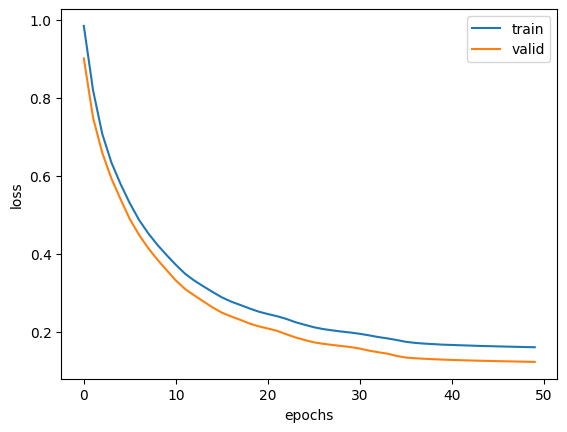

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1)
sns.lineplot(train_loss, label="train", ax=ax)
sns.lineplot(valid_loss, label="valid", ax=ax)
ax.set_xlabel("epochs")
ax.set_ylabel("loss")

In [38]:
test_reconstruction_error = get_loss_list(args=args, model=model, test_loader=test_data_loader)

testing:   0%|          | 0/740 [00:00<?, ?it/s]

In [39]:
train_reconstruction_error = get_loss_list(args=args, model=model, test_loader=train_data_loader)

testing:   0%|          | 0/400 [00:00<?, ?it/s]

In [41]:
test_mean_recon_error = []
for w_recon in test_reconstruction_error:
    test_mean_recon_error.append(np.mean(w_recon))

In [42]:
train_mean_recon_error = []
for w_recon in train_reconstruction_error:
    train_mean_recon_error.append(np.mean(w_recon))

Text(0, 0.5, 'reconstruction error')

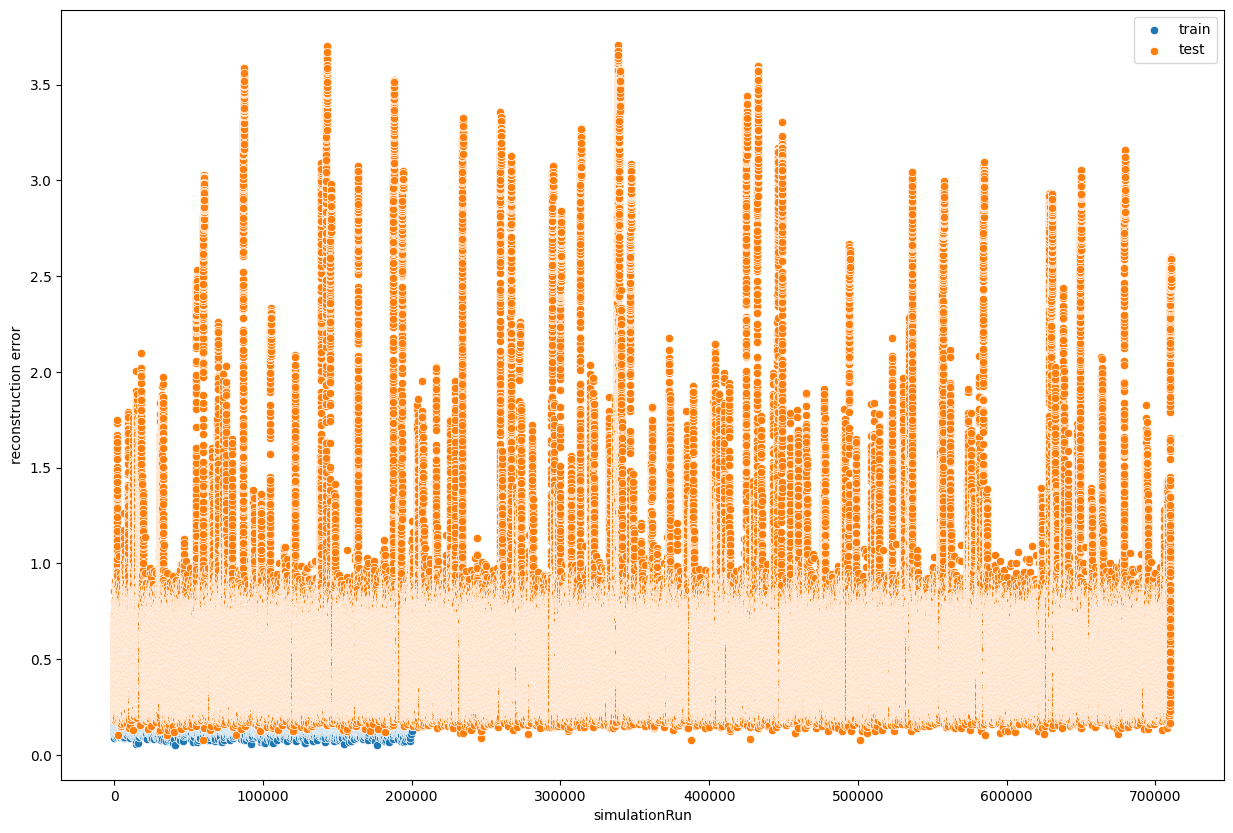

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 10)
sns.scatterplot(train_mean_recon_error, label="train", ax=ax)
sns.scatterplot(test_mean_recon_error, label="test", ax=ax)
ax.set_xlabel("simulationRun")
ax.set_ylabel("reconstruction error")

Text(0.5, 1.0, 'mean reconstruction error Distribution')

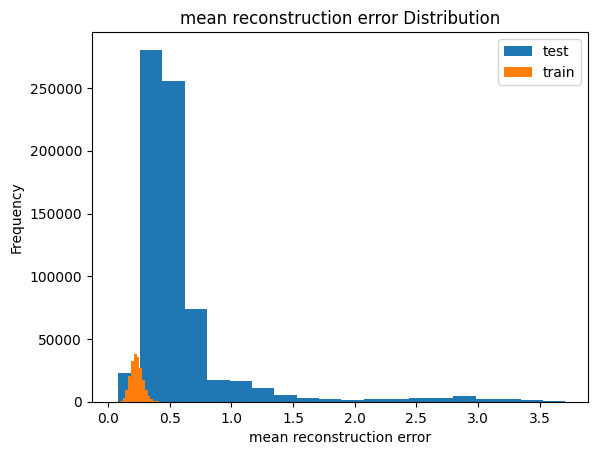

In [65]:
# reconstruction error 히스토그램 시각화 
plt.hist(test_mean_recon_error, label="test", bins=20)
plt.hist(train_mean_recon_error, label="train", bins=20)
plt.legend(["test", "train"])
plt.xlabel('mean reconstruction error')
plt.ylabel('Frequency') 
plt.title('mean reconstruction error Distribution')

In [53]:
len(np.where(max(train_mean_recon_error) < test_mean_recon_error)[0])

301048

In [54]:
faultnum = np.where((max(train_mean_recon_error) < test_mean_recon_error), 1, 0)

In [55]:
faultnum

array([0, 0, 0, ..., 1, 1, 1])

In [56]:
submission = pd.DataFrame(data = faultnum, columns=["faultNumber"])

In [57]:
submission

,faultNumber
0,0
1,0
2,0
3,0
4,0
...,...
710395,1
710396,1
710397,1
710398,1


In [58]:
pd.concat([test_data, submission], axis=1)

,sample,simulationRun,xmeas_1,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,...,xmv_11,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,faultNumber
0,1,151,-0.002338,-0.060916,0.145882,0.131802,-0.169875,0.709839,0.573962,-0.163616,...,-0.549712,-0.105689,-0.103624,0.019535,-0.112630,0.019492,0.132072,0.573828,-0.074321,0
1,2,151,0.036047,-0.026502,0.105273,-0.531288,-0.175520,0.771414,1.502962,-0.165572,...,0.391304,-0.096390,-0.130366,-0.579333,-0.125911,-0.006767,-0.531376,1.502670,-0.106289,0
2,3,151,0.020263,-0.056182,0.167482,-1.447268,-0.158585,0.008259,1.684231,-0.157747,...,-0.544315,-0.021046,-0.118821,-0.338023,-0.090153,0.015741,-1.446874,1.684012,-0.059987,0
3,4,151,-0.015730,-0.100793,0.181306,-1.729031,-0.177402,-1.118748,-0.462421,-0.146009,...,-0.636064,-0.049893,-0.093607,0.205601,-0.110791,0.049730,-1.728696,-0.462713,-0.060074,0
4,5,151,-0.117850,-0.356989,0.159706,-1.569730,-0.171757,-1.617878,-0.384594,-0.157747,...,-0.418674,-0.141178,-0.179012,-0.153144,-0.131939,-0.181715,-1.569346,-0.385238,-0.065895,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710395,956,438,-2.983064,-2.429497,-6.239227,0.335907,5.251080,0.237765,-0.463406,6.517143,...,0.008767,-2.365989,6.283341,6.375090,7.853322,-4.328596,0.336419,-0.463990,4.528284,1
710396,957,438,-2.983064,-2.429497,-6.239227,0.335907,5.251080,0.237765,-0.463406,6.517143,...,0.007903,-2.050762,6.283341,6.375090,7.853322,-4.526075,0.336419,-0.463990,4.528284,1
710397,958,438,-2.983064,-2.429497,-6.239227,0.335907,5.251080,0.237765,-0.463406,6.517143,...,0.006824,-2.050762,6.283341,6.375090,7.853322,-4.526075,0.336419,-0.463990,4.528284,1
710398,959,438,-2.983064,-2.429497,-6.239227,0.335907,5.251080,0.237765,-0.463406,6.517143,...,0.005744,-2.386486,6.283341,6.375090,7.853322,-4.324606,0.336419,-0.463990,4.528284,1


In [59]:
desc_pred = pd.concat([test_data, submission], axis=1)[["simulationRun", "sample", "faultNumber"]]

In [60]:
desc_pred

,simulationRun,sample,faultNumber
0,151,1,0
1,151,2,0
2,151,3,0
3,151,4,0
4,151,5,0
...,...,...,...
710395,438,956,1
710396,438,957,1
710397,438,958,1
710398,438,959,1


In [61]:
desc_pred.query("faultNumber==1").groupby("simulationRun").count()

,sample,faultNumber
simulationRun,,
0,327,327
1,322,322
2,342,342
3,334,334
4,313,313
...,...,...
735,324,324
736,293,293
737,847,847


In [62]:
import plotly.graph_objects as go

fig = go.Figure()
plot_data = desc_pred.query("faultNumber==1").groupby("simulationRun").count()

fig.add_trace(go.Scatter(x=plot_data.index, y=plot_data["faultNumber"], mode='markers'))

fig.update_layout(width = 1400, height = 800, xaxis_title='simulationRun', yaxis_title='Number of anomaly')